# Genetic Algorithms

Genetic Algorithms are based on the ideas of natural selection. They are primarily used for optimisation and search problems.
Generally, they use three "biological" operators: mutation, crossover and selection.

A genetic algorithm requires
- a representation of all the "organisms" in a population
- a fitness function

A general outline of the algorithm is as follows:
1. Initialise a random population
2. Selection of "organisms" to reproduce
3. Apply genetic operators
4. Termination

Steps 2 and 3 are repeated until an acceptable solution is found.

## Applications
Genetic algorithms can be applied to various problems, such as timetabling and scheduling, the travelling salesman problem, solving sudokus and hyperperameter optimisation.

Ideas such as elitism can be used to further improve genetic algorithms, however they do have some limitations.

- They rely heavily on the fitness function to evaluate each solution
- They have a tendency to converge to a local optima
- They don't scale well with complexity

TSP problem where we start at finish at the origin (0,0)

In [1]:
import numpy as np
np.random.seed(0)

from time import time

In [2]:
def create_nodes(n_nodes):
    nodes = []
    for _ in range(n_nodes):
        nodes.append((np.random.randint(0,1000), np.random.randint(0,1000)))

    return nodes

nodes = create_nodes(11)

In [3]:
class TSP:
    def __init__(self, nodes, origin=(0,0), rand=True):
        self.n = len(nodes)
        self.origin = origin
        self.nodes = nodes.copy()
        if rand:
            np.random.shuffle(self.nodes)

    def __str__(self):
        return str(self.nodes)

    def __eq__(self, other):
        return self.get_score() == other.get_score()

    def __gt__(self, other):
        return self.get_score() > other.get_score()

    def get_dist(self, a, b):
        # Find the distance between a and b
        return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    def get_score(self):
        # Calculate the distance of our path and then add the distance between the origin and the first node and the origin and the last node
        total = 0
        for i in range(1, self.n - 1):
            total += self.get_dist(self.nodes[i-1], self.nodes[i])

        total += self.get_dist(self.origin, self.nodes[0]) + self.get_dist(self.nodes[self.n - 1], self.origin)
        return total

    def get_nodes(self):
        return self.nodes

    def mutate(self):
        i = np.random.randint(0,self.n)
        j = np.random.randint(0,self.n)
        self.nodes[i], self.nodes[j] = self.nodes[j], self.nodes[i]

    def __add__(self, x):
        # AKA crossover
        x_nodes = x.get_nodes()
        cut = np.random.randint(1,self.n)
        part1 = x_nodes[:cut]
        part2 = [n for n in self.nodes if n not in part1]
        part3 = [n for n in x_nodes[cut:] if n not in part2]

        return TSP(part1 + part2 + part3)

    def copy(self):
        return TSP(self.nodes, self.origin, False)


In [4]:
P = 40 #if 20 < len(nodes) else len(nodes) # Population size
N = 500 #if P != len(nodes) else 100 # Number of generations
E = 2 # Number of best solutions to keep (elitism)
R = 4 #number of random solutions to introduce
M = 16 # Number of solutions to mutate

origin = (0,0)

start_time = time()

# Create an initial population
population = []
for _ in range(P):
    population.append(TSP(nodes))

# Sort the population by score, lowest scoring (best) first
population.sort()

for g in range(N):
    weights = [(P - x)/(0.5*P*(P+1)) for x in range(P)]
    children = []
    for _ in range(P - E - R - M):
        reproducers = [np.random.choice(population, 1, p=weights)[0], np.random.choice(population, 1)[0]]

        child = reproducers[0] + reproducers[1]
        
        children.append(child)

    for _ in range(R):
        child = TSP(nodes)
        children.append(child)

    for _ in range(M):
        child = np.random.choice(population,1)[0].copy()
        child.mutate()
        children.append(child)
    
    for e in range(E):
        children.append(population[e])

    population = children.copy()

    population.sort()

    if g % 50 == 0:
        print(population[0].get_score())

print(population[0].get_score())
best_nodes = population[0].get_nodes()

end_time = time()
ga_time = int(end_time - start_time)

3990.222687123509
3454.3040580518245
3454.3040580518245
3285.5169827401187
3118.4616300415278
3115.305024137039
3045.7071812473455
3045.7071812473455
3045.7071812473455
3045.7071812473455
3045.7071812473455


In [5]:
# Brute force approach.
from sys import maxsize 
from itertools import permutations

start_time = time()

N = len(nodes)

def dist(a, b):
    # Find the distance between a and b
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# store all vertex apart from source vertex 
# store minimum weight Hamiltonian Cycle 
min_path_weight = maxsize 
all_permutations=permutations(nodes)
best_path = None

for permutation in all_permutations:
 
    # store current Path weight(cost) 
    current_pathweight = 0
 
    # Calculate the distance of our path and then add the distance between the origin and the first node and the origin and the last node
    for i in range(1, N - 1):
        current_pathweight += dist(permutation[i-1], permutation[i])

    current_pathweight += dist(origin, permutation[0]) + dist(permutation[N - 1], origin)
 
    # update minimum 
    min_path_weight = min(min_path_weight, current_pathweight)
    if min_path_weight == current_pathweight:
        best_path = permutation

print(min_path_weight)
print(best_path)

end_time = time()

bf_time = int(end_time - start_time)

2755.5132488551244
((70, 472), (9, 723), (277, 754), (314, 705), (486, 551), (600, 396), (707, 359), (684, 559), (804, 599), (835, 763), (629, 192))


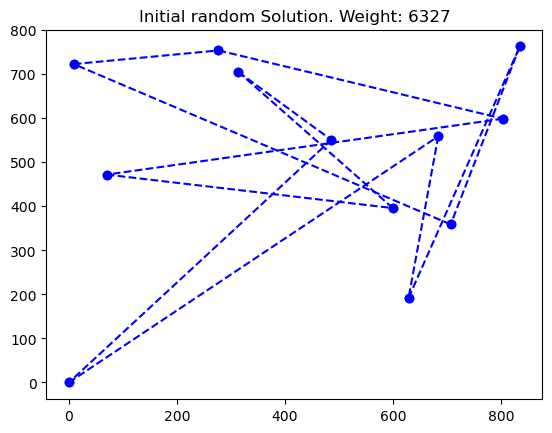

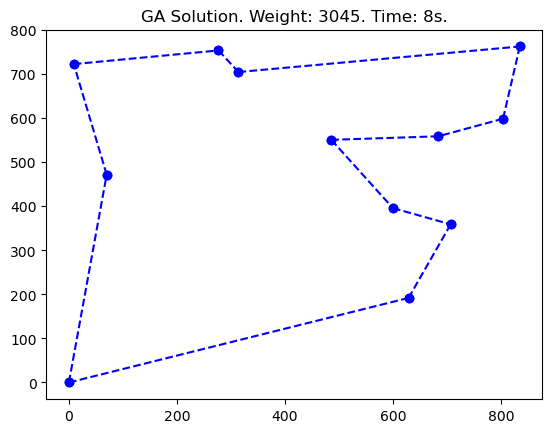

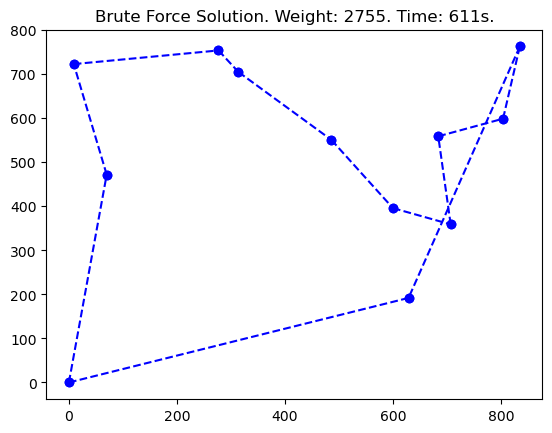

In [6]:
# Plot graphs
import matplotlib.pyplot as plt

x_values = [0, nodes[0][0]]
y_values = [0, nodes[0][1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

for n_i in range(len(best_nodes) - 1):
    x_values = [nodes[n_i][0], nodes[n_i + 1][0]]
    y_values = [nodes[n_i][1], nodes[n_i + 1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

x_values = [nodes[len(nodes) - 1][0], 0]
y_values = [nodes[len(nodes) - 1][1], 0]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.title("Initial random Solution. Weight: " + str(int(TSP(nodes, origin, False).get_score())))

plt.show()

x_values = [0, best_nodes[0][0]]
y_values = [0, best_nodes[0][1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

for n_i in range(len(best_nodes) - 1):
    x_values = [best_nodes[n_i][0], best_nodes[n_i + 1][0]]
    y_values = [best_nodes[n_i][1], best_nodes[n_i + 1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

x_values = [best_nodes[len(best_nodes) - 1][0], 0]
y_values = [best_nodes[len(best_nodes) - 1][1], 0]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.title("GA Solution. Weight: " + str(int(population[0].get_score())) + ". Time: " + str(ga_time) + "s.")
plt.show()

x_values = [0, best_path[0][0]]
y_values = [0, best_path[0][1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")

for n_i in range(len(best_path) - 1):
    x_values = [best_path[n_i][0], best_path[n_i + 1][0]]
    y_values = [best_path[n_i][1], best_path[n_i + 1][1]]
    plt.plot(x_values, y_values, 'bo', linestyle="--")

x_values = [best_path[len(best_path) - 1][0], 0]
y_values = [best_path[len(best_path) - 1][1], 0]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.title("Brute Force Solution. Weight: " + str(int(min_path_weight)) + ". Time: " + str(bf_time) + "s.")
plt.show()
